<a href="https://colab.research.google.com/github/Sukriti-419/SIH_agro_project/blob/develop/NavigationAndRoute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Navigation and Route Optimization

### 1: Load and analyze dataset

In [3]:
import xarray as xr

# Load NetCDF dataset
ds = xr.open_dataset(r"/content/sample_data/cmems_mod_glo_phy_anfc_0.083deg_PT1H-m_1758047994208.nc")

print(ds)

<xarray.Dataset> Size: 176MB
Dimensions:    (time: 1, depth: 1, latitude: 2041, longitude: 4320)
Coordinates:
  * time       (time) datetime64[ns] 8B 2025-09-25T23:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
Data variables:
    so         (time, depth, latitude, longitude) float32 35MB ...
    thetao     (time, depth, latitude, longitude) float32 35MB ...
    uo         (time, depth, latitude, longitude) float32 35MB ...
    vo         (time, depth, latitude, longitude) float32 35MB ...
    zos        (time, depth, latitude, longitude) float32 35MB ...
Attributes:
    Conventions:       CF-1.11
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    institution:       Mercator Ocean International
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MOI GLO12
  

In [4]:
ds.head()


<xarray.Dataset> Size: 552B
Dimensions:    (time: 1, depth: 1, latitude: 5, longitude: 5)
Coordinates:
  * time       (time) datetime64[ns] 8B 2025-09-25T23:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 20B -80.0 -79.92 -79.83 -79.75 -79.67
  * longitude  (longitude) float32 20B -180.0 -179.9 -179.8 -179.8 -179.7
Data variables:
    so         (time, depth, latitude, longitude) float32 100B ...
    thetao     (time, depth, latitude, longitude) float32 100B ...
    uo         (time, depth, latitude, longitude) float32 100B ...
    vo         (time, depth, latitude, longitude) float32 100B ...
    zos        (time, depth, latitude, longitude) float32 100B ...
Attributes:
    Conventions:       CF-1.11
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    institution:       Mercator Ocean International
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MOI GLO12
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:datasetId:  cmems_mod_glo_phy_anfc_0.083deg_PT1H-m_202406
    subset:date:       2025-09-16T18:39:54.209Z

In [5]:
# list of variable names
print(ds.data_vars)

# shape of a variable
print(ds['uo'].shape)

# available coordinates
print(ds.coords)

# first 5 lat/lon values
print(ds['latitude'].values[:5])
print(ds['longitude'].values[:5])

Data variables:
    so       (time, depth, latitude, longitude) float32 35MB ...
    thetao   (time, depth, latitude, longitude) float32 35MB ...
    uo       (time, depth, latitude, longitude) float32 35MB ...
    vo       (time, depth, latitude, longitude) float32 35MB ...
    zos      (time, depth, latitude, longitude) float32 35MB ...
(1, 1, 2041, 4320)
Coordinates:
  * time       (time) datetime64[ns] 8B 2025-09-25T23:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
[-80.       -79.916664 -79.833336 -79.75     -79.666664]
[-180.      -179.91667 -179.83333 -179.75    -179.66667]


### 2: taking subset of one region

In [6]:
# Define bounding box of Arabian Sea
lat_bounds = [0, 30]
lon_bounds = [50, 80]

# Subset data
ds_region = ds.sel(latitude=slice(lat_bounds[0], lat_bounds[1]),
                   longitude=slice(lon_bounds[0], lon_bounds[1]))
ds_region

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 1, depth: 1, latitude: 361, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 8B 2025-09-25T23:00:00
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 1kB 0.0 0.08333 0.1667 ... 29.83 29.92 30.0
  * longitude  (longitude) float32 1kB 50.0 50.08 50.17 ... 79.75 79.83 79.92
Data variables:
    so         (time, depth, latitude, longitude) float32 520kB ...
    thetao     (time, depth, latitude, longitude) float32 520kB ...
    uo         (time, depth, latitude, longitude) float32 520kB ...
    vo         (time, depth, latitude, longitude) float32 520kB ...
    zos        (time, depth, latitude, longitude) float32 520kB ...
Attributes:
    Conventions:       CF-1.11
    title:             hourly mean fields from Global Ocean Physics Analysis ...
    institution:       Mercator Ocean International
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MOI GLO12
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:datasetId:  cmems_mod_glo_phy_anfc_0.083deg_PT1H-m_202406
    subset:date:       2025-09-16T18:39:54.209Z

In [7]:
# Extract ocean currents
uo = ds_region['uo'].isel(time=0, depth=0)
vo = ds_region['vo'].isel(time=0, depth=0)

In [8]:
# speed and distance
import numpy as np

speed = np.sqrt(uo**2 + vo**2)
direction = np.arctan2(vo, uo)

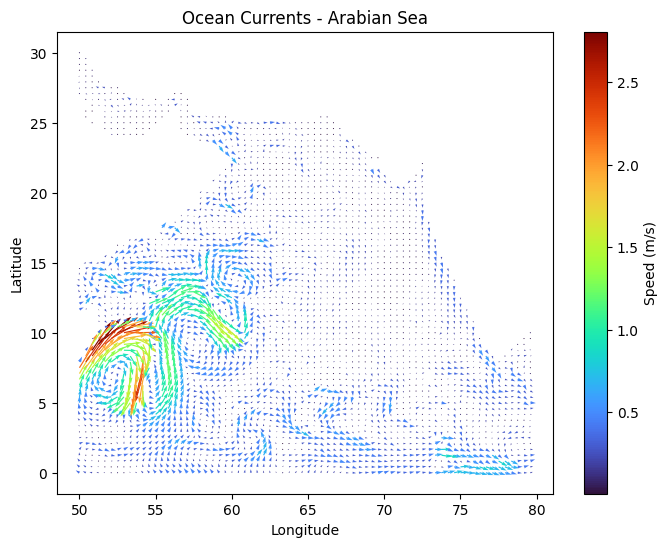

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.quiver(uo['longitude'][::5], uo['latitude'][::5],
           uo.values[::5, ::5], vo.values[::5, ::5],
           speed.values[::5, ::5], cmap='turbo')
plt.colorbar(label='Speed (m/s)')
plt.title("Ocean Currents - Arabian Sea")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### 3: to find grid cost

In [10]:
import numpy as np

# take the same slice we used for plotting
u = uo[:, :]
v = vo[:, :]
lat = ds_region['latitude'].values
lon = ds_region['longitude'].values

# Calculate speed (magnitude of current)
speed = np.sqrt(u**2 + v**2)

# Define cost as inverse of speed
# Add a small constant to avoid division by zero
cost_grid = 1 / (speed + 0.1)

# penalize very strong currents (hazardous zones)
cost_grid = cost_grid.values
cost_grid[speed.values > 2.5] = 100

print("Cost Grid Shape:", cost_grid.shape)
print("Sample Costs:", cost_grid[10:15, 10:15])

Cost Grid Shape: (361, 360)
Sample Costs: [[4.620866  4.861812  5.328125  5.7973185 6.2324867]
 [4.8859067 5.280432  5.9036756 6.6825056 7.37962  ]
 [5.5784554 6.317205  7.3537354 8.210871  6.7573037]
 [6.5060415 7.1856217 7.5839095 6.4544086 5.138014 ]
 [7.2810445 7.446892  7.08606   5.9115887 4.656582 ]]


In [11]:
import heapq
import matplotlib.pyplot as plt

# Helper: Find nearest grid index for a given lat/lon
def find_nearest_grid(lat_array, lon_array, target_lat, target_lon):
    lat_idx = (np.abs(lat_array - target_lat)).argmin()
    lon_idx = (np.abs(lon_array - target_lon)).argmin()
    return lat_idx, lon_idx

# Example ports of arabian sea
start_lat, start_lon = 8, 55   # near Oman
end_lat, end_lon = 15, 70      # near India west coast

start = find_nearest_grid(lat, lon, start_lat, start_lon)
end = find_nearest_grid(lat, lon, end_lat, end_lon)

print("Start grid:", start, "End grid:", end)

Start grid: (np.int64(96), np.int64(60)) End grid: (np.int64(180), np.int64(240))


### 4: Apply A* algorithm

In [12]:
import heapq
import numpy as np

def heuristic(a, b):
    """Euclidean distance heuristic."""
    return np.linalg.norm(np.array(a) - np.array(b))

def astar(cost_grid, start, goal):
    """
    A* pathfinding on 2D cost grid.
    cost_grid: 2D numpy array (lower = better)
    start: (row, col)
    goal: (row, col)
    """
    rows, cols = cost_grid.shape
    open_set = [(0, start)]  # (f_score, node)
    came_from = {}

    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    visited = set()

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            # reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # reverse path

        visited.add(current)

        # 8 possible moves (N, S, E, W, diagonals)
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1),
                       (-1,-1),(-1,1),(1,-1),(1,1)]:
            nr, nc = current[0]+dr, current[1]+dc
            if 0 <= nr < rows and 0 <= nc < cols:
                neighbor = (nr, nc)
                if neighbor in visited:
                    continue

                tentative_g = g_score[current] + cost_grid[nr, nc]

                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # no path found

✅ Path found! Length: 215


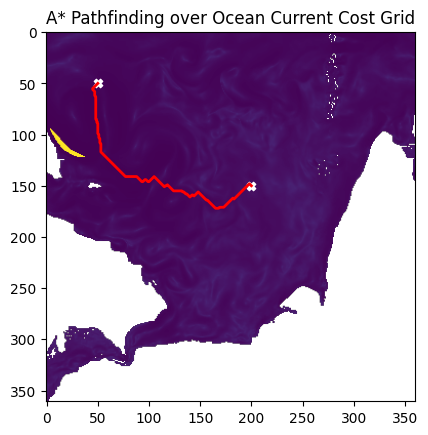

In [13]:
# Visualization
start = (50, 50)
goal = (150, 200)

path = astar(cost_grid, start, goal)

if path:
    print("✅ Path found! Length:", len(path))
else:
    print("❌ No path found")

# Plot path on top of grid
import matplotlib.pyplot as plt
plt.imshow(cost_grid, cmap="viridis")
path_x, path_y = zip(*path)
plt.plot(path_y, path_x, color="red", linewidth=2)  # note (row,col) → (y,x)
plt.scatter([start[1], goal[1]], [start[0], goal[0]], color="white", marker="X")
plt.title("A* Pathfinding over Ocean Current Cost Grid")
plt.show()

### 5: Evaluation Metrics of model

In [14]:
path_length = len(path)
print("Path Length:", path_length)

Path Length: 215


In [15]:
# total_cost = energy/time proxy
total_cost = sum(cost_grid[x, y] for x, y in path)
print("Total Cost:", total_cost)

Total Cost: 328.2594


In [17]:
# execution time
import time

start_time = time.time()
path_astar = astar(cost_grid, start, goal)
print("⏱ A* Time:", time.time() - start_time)

⏱ A* Time: 0.7400038242340088


In [19]:
# deviation from geodesic
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # km distance
    R = 6371
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1))*cos(radians(lat2))*sin(dlon/2)**2
    return 2 * R * asin(sqrt(a))

geo_dist = haversine(start_lat, start_lon, end_lat, end_lon)

grid_spacing_km = 9
path_dist = path_length * grid_spacing_km

print("Geodesic Distance (km):", geo_dist)
print("Path Distance (km):", path_dist)

Geodesic Distance (km): 1809.1137504298795
Path Distance (km): 1935


In [21]:
%pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.6 MB/s eta 0:00:00


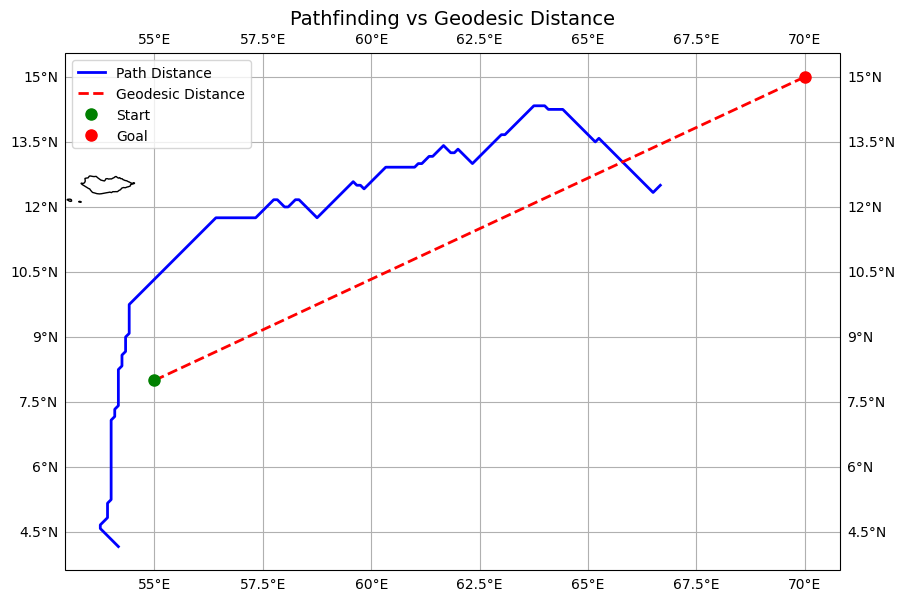

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

path_latlon = [(lat[i], lon[j]) for i, j in path]

path_lats, path_lons = zip(*path_latlon)

# Initialize map
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Pathfinding vs Geodesic Distance", fontsize=14)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot path
ax.plot(path_lons, path_lats, color='blue', linewidth=2, label="Path Distance")

# Plot geodesic
ax.plot([start_lon, end_lon], [start_lat, end_lat],
        color='red', linestyle='--', linewidth=2, label="Geodesic Distance")

# Mark start and goal
ax.plot(start_lon, start_lat, 'go', markersize=8, label="Start")
ax.plot(end_lon, end_lat, 'ro', markersize=8, label="Goal")

ax.legend()
plt.show()